# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.240652e+01     1.430915e+01
 * time: 0.002810955047607422
     1     6.059087e+01     1.052457e+01
 * time: 0.008445978164672852
     2     5.392617e+01     1.311827e+01
 * time: 0.021368026733398438
     3     3.846522e+01     8.417517e+00
 * time: 0.03878307342529297
     4     2.728137e+01     7.579102e+00
 * time: 0.11912894248962402
     5     1.940344e+01     5.228708e+00
 * time: 0.13484811782836914
     6     1.439572e+01     4.848000e+00
 * time: 0.14745092391967773
     7     1.234421e+01     5.487749e+00
 * time: 0.15799593925476074
     8     1.055773e+01     3.553210e+00
 * time: 0.17101502418518066
     9     7.845288e+00     4.093102e+00
 * time: 0.1842210292816162
    10     6.627742e+00     2.180796e+00
 * time: 0.19744300842285156
    11     6.331383e+00     1.534756e+00
 * time: 0.20791196823120117
    12     6.247496e+00     1.103065e+00
 * time: 0.2185831069946289
    13     6.221870e+00     8.252508e-01
 * time

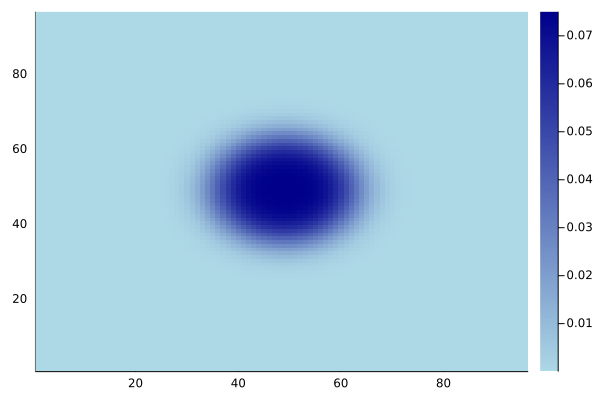

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))